In [1]:
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import xarray as xr
import gsw
import metpy
from pathlib import Path
import cartopy.crs as ccrs
import geopy.distance
import mplniw.utils as ut
import mplniw.sigp as sp
import matplotlib.gridspec as gridspec

import gvpy as gv

import niskine

In [2]:
conf = niskine.io.load_config()
m1lon, m1lat, m1bottom_depth = niskine.io.mooring_location(mooring=1)
m2lon, m2lat, m2bottom_depth = niskine.io.mooring_location(mooring=2)
m3lon, m3lat, m3bottom_depth = niskine.io.mooring_location(mooring=3)
root_dir = '/Users/zcasparcohen/codes/NIW/data/'

In [3]:
alt = niskine.io.load_ssh()

In [4]:
alt['eke'] = 1/2 * (alt.ugosa**2 + alt.vgosa**2)

In [5]:
f = gv.ocean.inertial_frequency(m1lat)


In [6]:
from datetime import datetime
eke = alt.eke.sel(time=slice('2019-06-01','2020-10-01'))#.plot()
_time = eke.time

In [7]:
vort = metpy.calc.vorticity(alt.ugosa, alt.vgosa)
vort = vort.metpy.dequantify()
vort = vort / f
vort.attrs = dict(long_name='$\zeta / f$', units='')
vort = vort.sel(time=slice('2019-06-01','2020-10-01'))

(<matplotlib.patches.Rectangle at 0x17ca3c610>,
 (<matplotlib.patches.ConnectionPatch at 0x177e8ef50>,
  <matplotlib.patches.ConnectionPatch at 0x17bf53810>))

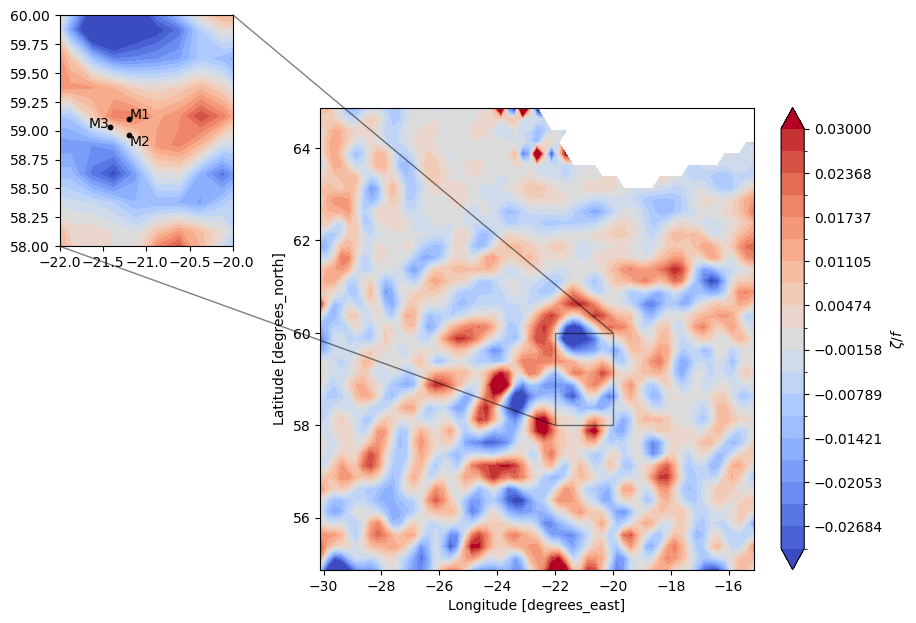

In [8]:
fig,ax = plt.subplots(figsize=(7,6))
vort.mean('time').plot.contourf(ax=ax,cmap='coolwarm',levels=20,vmin=-0.03,vmax=0.03,cbar_kwargs={'label':r'$\zeta /f $'})
#ax.scatter(m1lon,m1lat,s=2);ax.scatter(m2lon,m2lat,s=2);ax.scatter(m3lon,m3lat,s=2)
axins = ax.inset_axes([-0.6, 0.7, 0.4, 0.5])
vort.mean('time').plot.contourf(ax=axins,cmap='coolwarm',levels=20,vmax=0.03,add_colorbar=False)
axins.set_xlim((-22),(-20))
axins.set_ylim((58),(60))
axins.scatter(m1lon,m1lat,s=10,c='k');axins.scatter(m2lon,m2lat,s=10,c='k');axins.scatter(m3lon,m3lat,s=10,c='k')
axins.set_ylabel('');axins.set_xlabel('')
axins.text(m1lon,m1lat,'M1');axins.text(m2lon,m2lat-0.1,'M2');axins.text(m3lon-0.25,m3lat,'M3')
ax.indicate_inset_zoom(axins,edgecolor='black')

In [9]:
import cartopy.crs as ccrs

In [8]:
from datetime import datetime
_time = vort.time
v0=0.25

In [9]:
m1vort = vort.interp(lon=m1lon, lat=m1lat)
m1eke = alt.eke.interp(lon=m1lon, lat=m1lat)

m2vort = vort.interp(lon=m2lon, lat=m2lat)
m2eke = alt.eke.interp(lon=m2lon, lat=m2lat)

m3vort = vort.interp(lon=m3lon, lat=m3lat)
m3eke = alt.eke.interp(lon=m3lon, lat=m3lat)

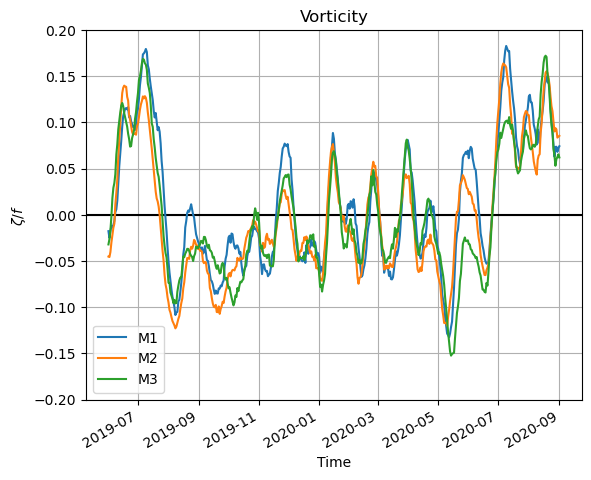

In [12]:
plt.axhline(0,c='k')
m1vort.sel(time=slice('2019-06-01','2020-09-01')).plot(label='M1')
m2vort.sel(time=slice('2019-06-01','2020-09-01')).plot(label='M2')
m3vort.sel(time=slice('2019-06-01','2020-09-01')).plot(label='M3')
#m1eke.sel(time=slice('2019-06-01','2020-09-01')).plot()
plt.grid();plt.legend();plt.title('Vorticity');plt.ylim(-0.2,0.2);


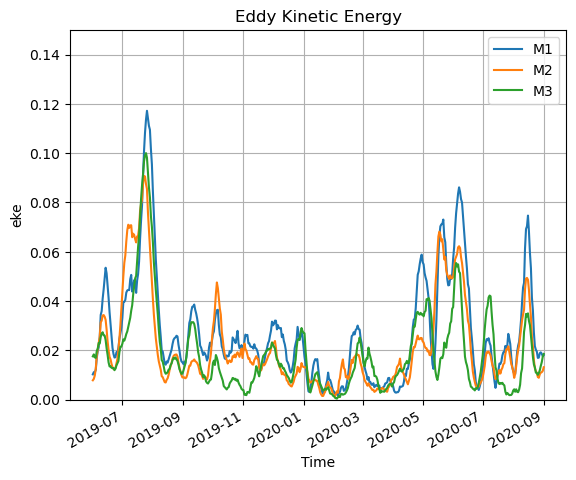

In [13]:
m1eke.sel(time=slice('2019-06-01','2020-09-01')).plot(label='M1')
m2eke.sel(time=slice('2019-06-01','2020-09-01')).plot(label='M2')
m3eke.sel(time=slice('2019-06-01','2020-09-01')).plot(label='M3')
plt.grid();plt.legend();plt.title('Eddy Kinetic Energy');plt.ylim(0,0.15);



In [10]:
d = 2 * (m1lon * (m2lat - m3lat) + m2lon * (m3lat - m1lat) + m3lon * (m1lat - m2lat))
midlon = ((m1lon * m1lon + m1lat * m1lat) * (m2lat - m3lat) + (m2lon * m2lon + m2lat * m2lat) * (m3lat - m1lat) + (m3lon * m3lon + m3lat * m3lat) * (m1lat - m2lat)) / d
midlat = ((m1lon * m1lon + m1lat * m1lat) * (m3lon - m2lon) + (m2lon * m2lon + m2lat * m2lat) * (m1lon - m3lon) + (m3lon * m3lon + m3lat * m3lat) * (m2lon - m1lon)) / d


Text(-21.297115194422187, 59.03211961693145, 'C')

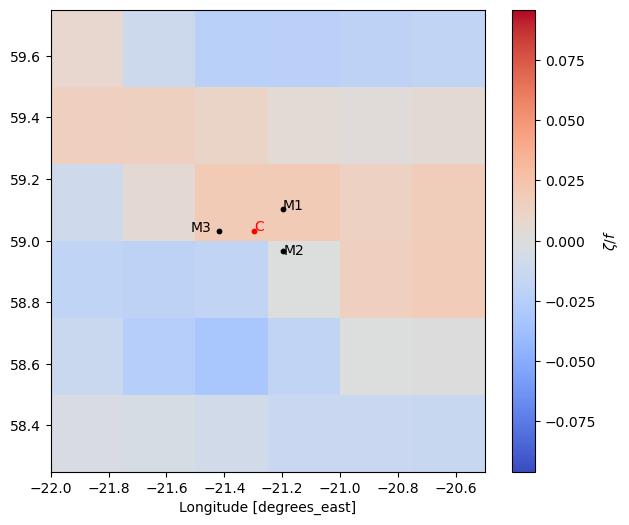

In [15]:
fig,ax = plt.subplots(figsize=(7,6))
vort.mean('time').plot(ax=ax,cmap='coolwarm',cbar_kwargs={'label':r'$\zeta /f $'})
ax.set_xlim((-22),(-20.5))
ax.set_ylim((58.25),(59.75))
ax.scatter(m1lon,m1lat,s=10,c='k');
ax.scatter(midlon,midlat,s=10,c='r');
ax.scatter(m2lon,m2lat,s=10,c='k');ax.scatter(m3lon,m3lat,s=10,c='k')
ax.set_ylabel('');axins.set_xlabel('')
ax.text(m1lon,m1lat,'M1');ax.text(m2lon,m2lat-0.01,'M2');ax.text(m3lon-0.1,m3lat,'M3')
ax.text(midlon,midlat,'C',c='r')

In [11]:
midvort = vort.interp(lon=midlon, lat=midlat)
mideke = alt.eke.interp(lon=midlon, lat=midlat)

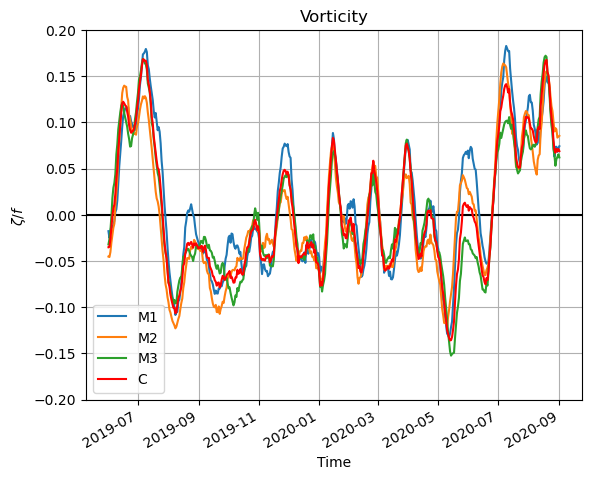

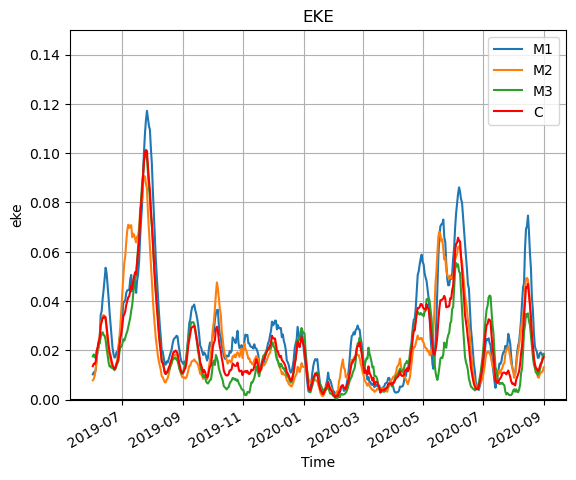

In [17]:
plt.axhline(0,c='k')
m1vort.sel(time=slice('2019-06-01','2020-09-01')).plot(label='M1')
m2vort.sel(time=slice('2019-06-01','2020-09-01')).plot(label='M2')
m3vort.sel(time=slice('2019-06-01','2020-09-01')).plot(label='M3')
midvort.sel(time=slice('2019-06-01','2020-09-01')).plot(c='r',label='C')
#m1eke.sel(time=slice('2019-06-01','2020-09-01')).plot()
plt.grid();plt.legend();plt.title('Vorticity');plt.ylim(-0.2,0.2);

plt.figure()
plt.axhline(0,c='k')
m1eke.sel(time=slice('2019-06-01','2020-09-01')).plot(label='M1')
m2eke.sel(time=slice('2019-06-01','2020-09-01')).plot(label='M2')
m3eke.sel(time=slice('2019-06-01','2020-09-01')).plot(label='M3')
mideke.sel(time=slice('2019-06-01','2020-09-01')).plot(c='r',label='C')
#m1eke.sel(time=slice('2019-06-01','2020-09-01')).plot()
plt.grid();plt.legend();plt.title('EKE');plt.ylim(0,0.15);

## Vorticity from moorings

In [12]:
conf = niskine.io.load_config()
lon, lat, bottom_depth = niskine.io.mooring_location(mooring=1)
root_dir = '/Users/zcasparcohen/codes/NIW/data/'
figdir = '/Users/zcasparcohen/Documents/NISKINE/Figures/'

In [13]:
moorings={}
for mooring in [1,2,3]:
    #gridded=xr.open_dataset(root_dir+'M%s_linear_merge_slinearfill.nc'%mooring)[['u','v']]
    gridded = xr.open_dataset(root_dir+'M%s_lpfiltered.nc'%mooring)#.interpolate_na(dim='time',method='cubic',max_gap=pd.Timedelta(3, "d"))
    ds = gridded[['u','v','u_filtered','v_filtered']]#.expand_dims({'lat':[lat],'lon':[lon]}) #sp.wrap_filter(gridded,h,**{'hilbert':False})
    mld_m1 = xr.open_dataarray(conf.data.ml.mld).sel(time=slice(ds.time[0],ds.time[-1]))
    ds['mld'] = mld_m1
    moorings[str(mooring)] = ds

In [14]:
for mooring in moorings:
    moorings[mooring] = moorings[mooring].where(np.isnan(moorings['3'].u)==False)

In [15]:
for mooring in moorings:
    moorings[mooring] = moorings[mooring].where((np.isnan(moorings['2'].u)==False)&(moorings['2'].count('time')>1000))

### Circle average

In [16]:
R = gsw.distance([m1lon,m2lon],[m1lat,m2lat])/(2*np.sin(60*np.pi/180))
#15*1e3/np.sqrt(3)
dt = 1/(24*6)  # Time step in days unit

fc = ut.coriolis(midlat)
RV = 2/3/R*((moorings['2'].v_filtered+moorings['1'].v_filtered)/2-moorings['3'].v_filtered)-1/np.sqrt(3)/R*(moorings['1'].u_filtered-moorings['2'].u_filtered)
RV = RV.interpolate_na('time',max_gap=pd.Timedelta(24, "h"))
RV_mean = RV.rolling(time=int(6/dt)).mean()

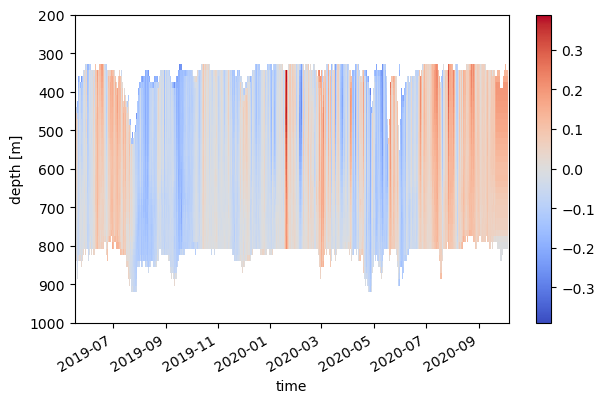

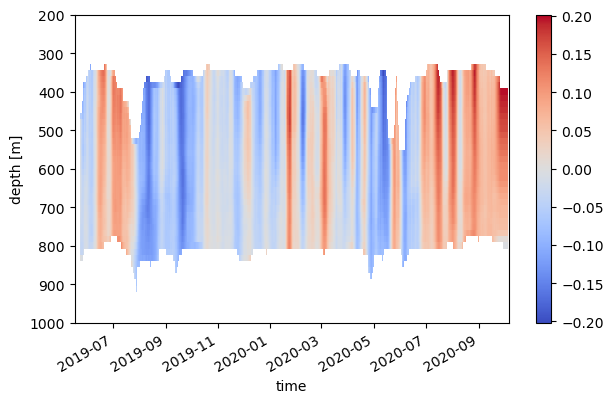

In [40]:
plt.figure(figsize=(7,4))
(RV/fc).plot(yincrease=False, cmap='coolwarm',ylim=(1000,200))

plt.figure(figsize=(7,4))
(RV_mean/fc).plot(yincrease=False, cmap='coolwarm',ylim=(1000,200))

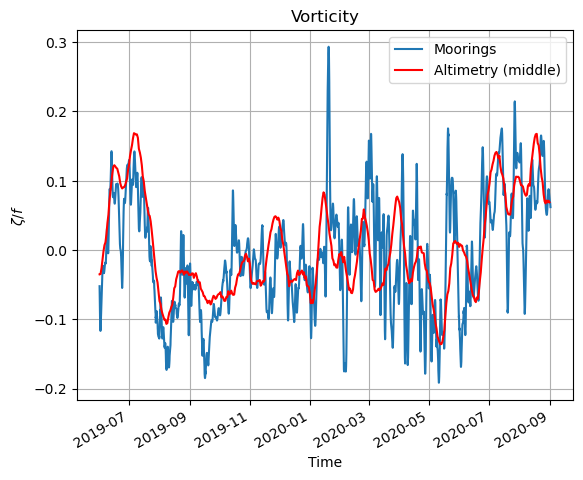

In [17]:
(RV/fc).mean('z').sel(time=slice('2019-06-01','2020-09-01')).plot(label='Moorings')
midvort.sel(time=slice('2019-06-01','2020-09-01')).plot(c='r',label='Altimetry (middle)')
plt.grid();plt.title('Vorticity');plt.legend()

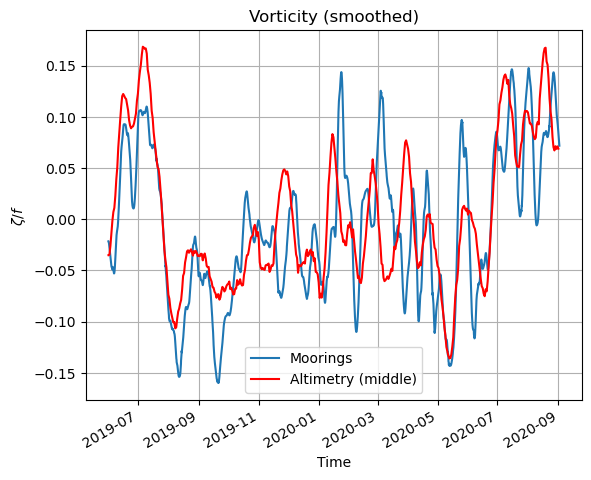

In [19]:
(RV_mean/fc).mean('z').sel(time=slice('2019-06-01','2020-09-01')).plot(label='Moorings')
midvort.sel(time=slice('2019-06-01','2020-09-01')).plot(c='r',label='Altimetry (middle)')
plt.grid();plt.title('Vorticity (smoothed)');plt.legend()



In [24]:
import matplotlib as mpl
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

In [34]:
# Wind
wind_work = xr.open_dataset(root_dir+'ni_wind_work_niskine_m1.nc').rename({'__xarray_dataarray_variable__':'wind_work'})
wind_stress = xr.open_dataset(root_dir+'wind_work/wind_stress_niskine_m1.nc')

In [36]:
wind_stress

<xarray.Dataset>
Dimensions:                        (time: 12160)
Coordinates:
  * time                           (time) datetime64[ns] 2019-05-17T17:00:00 ...
    lat                            float64 ...
    lon                            float64 ...
Data variables:
    __xarray_dataarray_variable__  (time) float64 ...

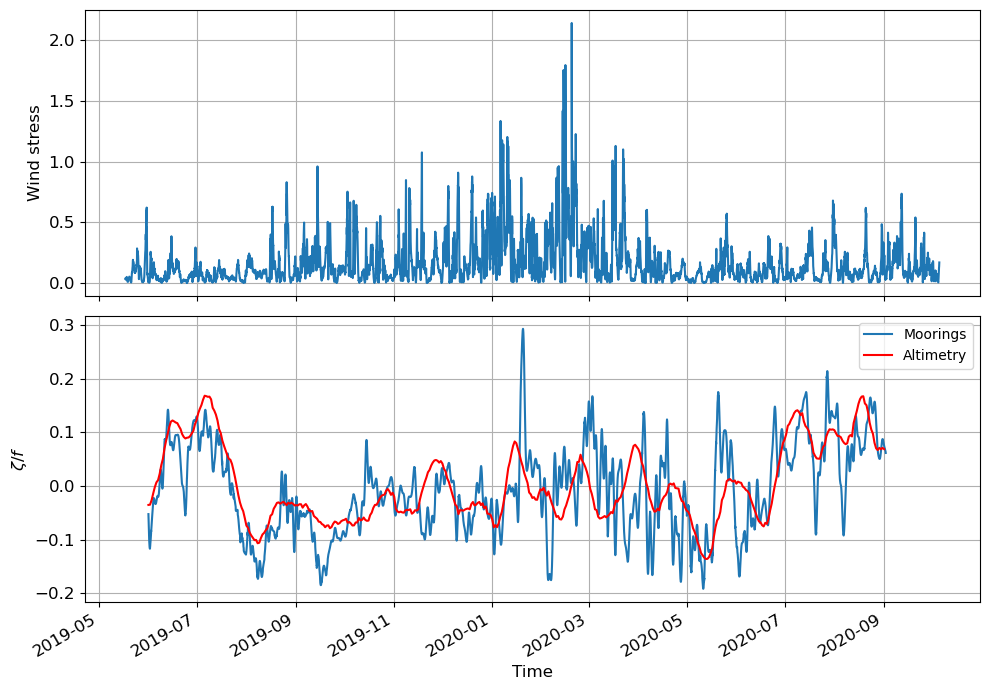

In [42]:
fig,axs = plt.subplots(2,1,figsize=(10,7),sharex=True)
ax = axs[0]
wind_stress['__xarray_dataarray_variable__'].plot(ax=ax)
ax.grid();ax.set_title('');ax.set_ylabel('Wind stress')
ax = axs[1]
(RV/fc).mean('z').sel(time=slice('2019-06-01','2020-09-01')).plot(ax=ax,label='Moorings')
midvort.sel(time=slice('2019-06-01','2020-09-01')).plot(ax=ax,c='r',label='Altimetry')
ax.grid();ax.set_title('');ax.legend()
fig.tight_layout()
fig.savefig('/Users/zcasparcohen/Documents/Figures_poster/wind_vort.jpg')

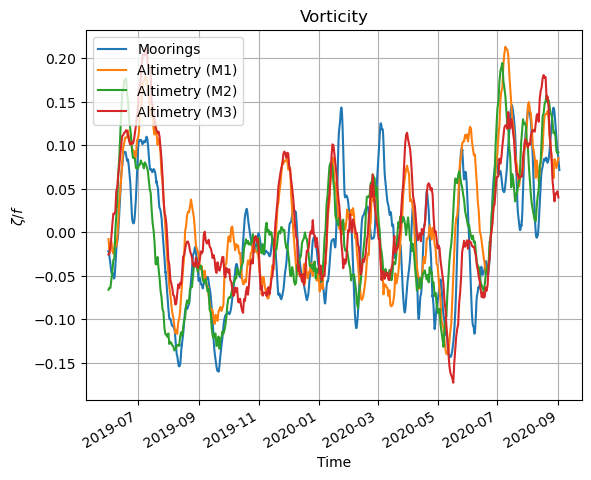

In [48]:
(RV_mean/fc).mean('z').sel(time=slice('2019-06-01','2020-09-01')).plot(label='Moorings')
vort.sel(lon=m1lon,lat=m1lat,method='nearest').sel(time=slice('2019-06-01','2020-09-01')).plot(label='Altimetry (M1)')
vort.sel(lon=m2lon,lat=m2lat,method='nearest').sel(time=slice('2019-06-01','2020-09-01')).plot(label='Altimetry (M2)')
vort.sel(lon=m3lon,lat=m3lat,method='nearest').sel(time=slice('2019-06-01','2020-09-01')).plot(label='Altimetry (M3)')
plt.grid();plt.title('Vorticity');plt.legend()

In [49]:
RV

<xarray.DataArray (z: 125, time: 73057)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * time     (time) datetime64[ns] 2019-05-17T16:00:00 ... 2020-10-06
  * z        (z) int64 0 16 32 48 64 80 96 ... 1904 1920 1936 1952 1968 1984

In [88]:
#ds = xr.Dataset({'moorings':(['z','time'],RV)})
ds = xr.Dataset({'vorticity':RV,'vorticity_norm':RV/fc,'vorticity_z':RV.differentiate('z')})

In [89]:
ds['vorticity'] = ds.vorticity.assign_attrs(units=r'$s^{-1}$',long_name=r'$\zeta$')
ds['vorticity_norm'] = ds.vorticity_norm.assign_attrs(units='',long_name=r'$\zeta / f $')
ds['vorticity_z'] = ds.vorticity_z.assign_attrs(units=r'$(m.s)^{-1}$',long_name=r'$\zeta_z$')

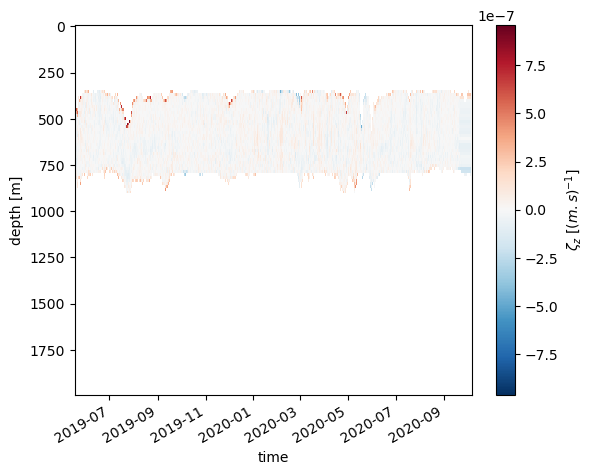

In [91]:
ds['vorticity_z'].plot(yincrease=False)

In [92]:
ds.to_netcdf(root_dir+'vorticity_moorings.nc')

In [87]:
vort.to_netcdf(root_dir+'vorticity_alt.nc')